In [38]:
import os
import numpy as np
import pandas as pd
import cv2
from datetime import *
from imu_video_synch import *
from zurich_move_data_extraction import *
from zurich_move_utilites import *

In [39]:
# Video side Steps
# Convert the video to MP4 for Labelbox 
# Import the metadata from the video
# Extract the exact frame start movement/end movement using Labelbox 
# From these 2 frames: get cutting time
# Trim the video at the exact timestamp -> trimmed_video
# Extract the new number of frames of the trimmed video 
# Get the new start timestamp
# save the trimmed video as MP4 for labelbox 

In [40]:
# Change participant here:
participant_id = 'H006'
path, video_path, imu_path = get_participant_paths(participant_id)
print("Video Path:", video_path)
print("IMU Path:", imu_path)

Video Path: ../CreateStudy\H006\H006.MOV
IMU Path: ../CreateStudy\H006\H006.mat


In [41]:
path

'../CreateStudy\\H006'

In [42]:
# Import the metadata from the video
metadata = extract_metadata(video_path)
number_frames, fps, recording_time, creation_time, timestamps = metadata

In [43]:
print(number_frames, fps, recording_time, creation_time, timestamps)

25598 25 1023.92 2023-07-20T10:20:53.000000Z ['2023-07-20 10:20:53.000000' '2023-07-20 10:20:53.040000'
 '2023-07-20 10:20:53.080000' ... '2023-07-20 10:37:56.800000'
 '2023-07-20 10:37:56.840000' '2023-07-20 10:37:56.880000']


In [44]:
creation_time

'2023-07-20T10:20:53.000000Z'

In [45]:
# Use this to find the frames starting/ending the recording 
read_video_frames(video_path)

In [48]:
# Extract the exact frame start movement/end movement using OpenCV  
frame_start = 5400
frame_end = 24576

In [49]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration = get_trimmed_video_timestamps(frame_start, frame_end, timestamps)

In [50]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration

(datetime.datetime(2023, 7, 20, 10, 24, 29),
 datetime.datetime(2023, 7, 20, 10, 37, 16, 40000),
 datetime.timedelta(seconds=767, microseconds=40000))

In [51]:
start_trimming_time, end_trimming_time = get_trimming_times(frame_start, frame_end)

In [52]:
# Trim the video at the exact timestamp -> trimmed_video
trimmed_video = trim_video(video_path, start_trimming_time, end_trimming_time, path)
print(f"Trimmed video saved as: {trimmed_video}")

Trimmed video already exists. Skipping trimming.
Trimmed video saved as: ../CreateStudy\H006\trimmed_H006.MOV


In [53]:
# Read the trimmed video
read_video_frames(trimmed_video)

In [54]:
# Convert the trimmed video to MP4 for Labelbox 
converted_trimmed_video = convert_from_mov_to_mp4(trimmed_video, path)

Converted video already exists. Skipping conversion.


In [55]:
# Extract the new metadat of the trimmed video 
trimmed_number_frames,  trimmed_fps,  trimmed_recording_time, trimmed_creation_time,  trimmed_timestamps = extract_metadata(converted_trimmed_video)
print(trimmed_number_frames, trimmed_fps, trimmed_recording_time, trimmed_creation_time, trimmed_timestamps)

19176 25 767.04 None None


In [56]:
# Create MP4 videos for Labelbox
# Filenames
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
labelbox_video_LW_filename = participant_id + '_LW.mp4'
labelbox_video_RW_filename = participant_id + '_RW.mp4'

# Paths
trimmed_video_path = os.path.join(path, trimmed_video_filename)
labelbox_video_LW_path = os.path.join(path, labelbox_video_LW_filename)
labelbox_video_RW_path = os.path.join(path, labelbox_video_RW_filename)

# Copy videos
labelbox_video_LW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_LW_path)
labelbox_video_RW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_RW_path)

File '../CreateStudy\H006\H006_LW.mp4' already exists. Skipping the copy process.
File '../CreateStudy\H006\H006_RW.mp4' already exists. Skipping the copy process.


In [57]:
# Extract the new metadat of the trimmed video 
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
trimmed_video_path = os.path.join(path, trimmed_video_filename)
number_frames_trimmed_video,  _,  _, _,  _ = extract_metadata(trimmed_video_path)
print(number_frames_trimmed_video)

19176


In [58]:
output_folder_LW = os.path.join(path, 'splitted_videos_LW')
output_folder_RW = os.path.join(path, 'splitted_videos_RW')
split_video_into_segments(labelbox_video_LW_path,output_folder_LW, trimmed_number_frames)
split_video_into_segments(labelbox_video_RW_path,output_folder_RW, trimmed_number_frames)

Segment 1 already exists. Skipping...
Segment 2 already exists. Skipping...
Segment 3 already exists. Skipping...
Segment 4 already exists. Skipping...
Segment 5 already exists. Skipping...
Segment 6 already exists. Skipping...
Segment 7 already exists. Skipping...
Segment 8 already exists. Skipping...
Segment 9 already exists. Skipping...
Segment 10 already exists. Skipping...
Segment 11 already exists. Skipping...
Segment 12 already exists. Skipping...
Segment 13 already exists. Skipping...
Video splitting completed!
Total number of frames in the segments matches the trimmed number of frames.
Segment 1 already exists. Skipping...
Segment 2 already exists. Skipping...
Segment 3 already exists. Skipping...
Segment 4 already exists. Skipping...
Segment 5 already exists. Skipping...
Segment 6 already exists. Skipping...
Segment 7 already exists. Skipping...
Segment 8 already exists. Skipping...
Segment 9 already exists. Skipping...
Segment 10 already exists. Skipping...
Segment 11 alread

In [59]:
# # IMU side Steps
# From the start timestamp and number of frame, extract the new IMU data
# Ensure 2 * trimmed_video_frames = number_sample_IMU
# The starting peak of acceleration should match the start of the new trimmed data 
# The end of the acceleration peak should match the end of the cut


In [60]:
# Define the sensor placements, sensor features, and dataframe features
sensor_placement = ['LW', 'chest', 'RW']
matlab_sensor_features = ['acc', 'gyro', 'quat', 'accHiG', 'magneto', 'press']
sensor_features = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'quat_0', 'quat_1', 'quat_2',
                   'quat_3', 'accHiG_x', 'accHiG_y', 'accHiG_z', 'magneto_x', 'magneto_y', 'magneto_z', 'press']
sensor_9DOF_features = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ',
                       'magnetoX', 'magnetoY', 'magnetoZ']
sensor_acc_features =  ['acc_x', 'acc_y', 'acc_z']


#Extract useful stuff
header = extract_header_data_from_mat_file(imu_path)
sampling_freq =get_sampling_freq(header)
time_array = extract_time_data_from_mat_file(imu_path)
recording_time = get_recording_time(time_array)
dfs = extract_sensors_data_from_mat_file(imu_path, sensor_placement, matlab_sensor_features, sensor_features)
#Usefull export to csv (for SimuLOOP script)
#export_to_csv(file_path, dfs, sensor_placement, matlab_sensor_features, sensor_features)
acc_LW = dfs['LW'][['acc_x', 'acc_y', 'acc_z']]
acc_RW = dfs['RW'][['acc_x', 'acc_y', 'acc_z']]
gyro_LW = dfs['LW'][['gyro_x', 'gyro_y', 'gyro_z']]
gyro_RW = dfs['RW'][['gyro_x', 'gyro_y', 'gyro_z']]
mag_LW = dfs['LW'][['magneto_x', 'magneto_y', 'magneto_z']]
quat_sensor_LW = dfs['LW'][['quat_0', 'quat_1', 'quat_2','quat_3']]
LW_data = dfs['LW']
RW_data = dfs['RW']
chest_data = dfs['chest']

In [61]:
header

,durationStr,freq,start,startStr,stop,stopStr,tsErrorSensorIDs
0,1 6 m   5 7 s ,50.0,1.689848e+09,2 0 2 3 / 0 7 / 2 0   1 0 : 2 0 : 0 8 . 0 0 0 ,1.689849e+09,2 0 2 3 / 0 7 / 2 0   1 0 : 3 7 : 0 5 . 0 0 0 ,                


In [62]:
IMU_start_timestamp, IMU_end_timestamp = get_datetime_timestamp(header)

2023-07-20 10:20:08.000000 2023-07-20 10:37:05.000000


In [63]:
IMU_start_timestamp

datetime.datetime(2023, 7, 20, 10, 20, 8)

In [64]:
timestamps_array = create_timestamps(IMU_start_timestamp, IMU_end_timestamp, 50)

In [65]:
timestamps_array

,timestamp
0,2023-07-20 10:20:08.000
1,2023-07-20 10:20:08.020
2,2023-07-20 10:20:08.040
3,2023-07-20 10:20:08.060
4,2023-07-20 10:20:08.080
...,...
50846,2023-07-20 10:37:04.920
50847,2023-07-20 10:37:04.940
50848,2023-07-20 10:37:04.960
50849,2023-07-20 10:37:04.980


In [66]:
RW_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,-0.259485,0.028875,-1.941865,-1.169740,1.476049,2.179245,0.233425,-0.927678,0.193887,0.217565,-0.888680,0.452433,-1.323145,446.999994,180.000055,-136.200079,1005.160000
1,-0.244948,0.021977,-1.923272,-1.262385,1.615523,2.149739,0.232321,-0.928007,0.194381,0.216902,-0.844422,0.499123,-1.313845,447.000023,179.999796,-136.199706,1005.160000
2,-0.239581,0.021849,-1.947892,-1.291656,1.649780,2.209565,0.231205,-0.928336,0.194882,0.216233,-0.851187,0.490955,-1.323929,446.999915,180.000761,-136.201100,1005.159999
3,-0.256918,0.021273,-1.946628,-1.237860,1.587192,2.199504,0.230075,-0.928666,0.195384,0.215569,-0.890244,0.428953,-1.284216,447.000316,179.997157,-136.195893,1005.160005
4,-0.251651,0.028160,-1.955780,-1.250913,1.524807,2.118939,0.228948,-0.928993,0.195876,0.214913,-0.843239,0.435739,-1.290505,446.998820,180.010617,-136.215336,1005.159980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50846,-0.226191,0.036673,-1.949091,-0.002018,-0.009190,-0.171759,-0.058523,-0.160328,-0.985323,0.002947,-0.874362,0.437265,-1.269827,262.800003,159.000001,-125.400002,1005.440000
50847,-0.238334,0.024638,-1.933423,-0.057300,-0.056456,-0.194490,-0.058515,-0.160312,-0.985326,0.002944,-0.881028,0.483676,-1.318416,262.799997,158.999999,-125.399999,1005.440000
50848,-0.237232,0.023989,-1.917151,-0.009558,-0.005949,-0.011521,-0.058517,-0.160313,-0.985326,0.002952,-0.833433,0.491013,-1.222678,262.800008,159.000002,-125.400003,1005.440000
50849,-0.225016,0.023182,-1.915951,0.061627,0.000862,0.001928,-0.058503,-0.160320,-0.985325,0.002953,-0.824532,0.442576,-1.307987,262.799972,158.999994,-125.399989,1005.440000


In [67]:
# Add timestamps to raw data
LW_data = pd.concat([timestamps_array, LW_data], axis=1)
RW_data = pd.concat([timestamps_array, RW_data], axis=1)
chest_data = pd.concat([timestamps_array, chest_data], axis=1)

In [68]:
LW_data

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,2023-07-20 10:20:08.000,0.215390,0.698380,-1.283311,-228.958239,202.695437,-36.386002,0.970161,-0.075286,-0.052980,0.224396,-0.601894,-0.195732,-2.551351,465.459748,-48.528551,32.695679,1010.317433
1,2023-07-20 10:20:08.020,0.192472,0.534638,-1.037464,-130.028882,248.880907,-40.002226,0.971083,-0.110301,-0.018988,0.210847,-0.579496,-0.551992,-2.309538,466.125778,-48.867849,34.140838,1010.187159
2,2023-07-20 10:20:08.040,0.885852,-0.038516,-1.550900,124.266458,163.715466,-0.758335,0.971982,-0.114040,0.017112,0.204827,-0.466567,0.228087,-2.031042,463.607093,-47.584745,28.675767,1010.679808
3,2023-07-20 10:20:08.060,0.961432,-0.795954,-2.699761,131.710632,64.052273,-43.073848,0.975248,-0.093460,0.034933,0.197348,-0.182321,-0.025261,-2.075242,432.530379,-31.753212,-38.754839,1016.758335
4,2023-07-20 10:20:08.080,0.679814,-0.856815,-3.667427,-110.826624,43.472529,-42.019812,0.976631,-0.095497,0.042593,0.187757,-0.205235,-0.207503,-2.681686,434.141627,-32.574037,-35.258733,1016.443179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50846,2023-07-20 10:37:04.920,-0.164975,0.060508,-2.048029,-0.058376,-0.119236,-0.000801,-0.029700,0.450171,-0.891928,-0.030475,-0.682088,0.048911,-2.243067,233.395554,-69.620007,-10.806669,1010.320000
50847,2023-07-20 10:37:04.940,-0.165107,0.051832,-2.045558,-0.123053,-0.123342,0.060873,-0.029694,0.450169,-0.891930,-0.030467,-0.683086,0.000363,-2.291908,233.401171,-69.594731,-10.798244,1010.320000
50848,2023-07-20 10:37:04.960,-0.157500,0.053899,-2.019601,-0.001749,-0.061859,0.001018,-0.029702,0.450161,-0.891933,-0.030468,-0.683112,0.047352,-2.293427,233.399692,-69.601388,-10.800463,1010.320000
50849,2023-07-20 10:37:04.980,-0.149232,0.037173,-2.033081,0.000300,-0.002670,-0.000084,-0.029703,0.450161,-0.891933,-0.030466,-0.682044,0.096839,-2.244657,233.400082,-69.599633,-10.799878,1010.320000


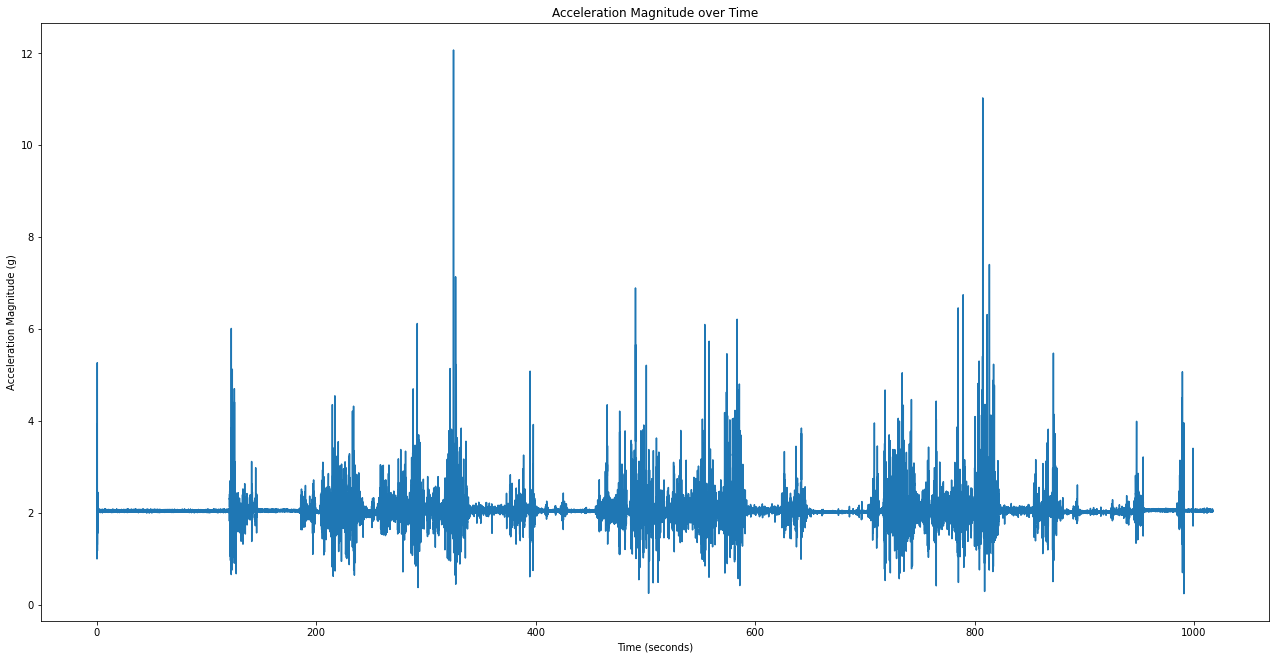

In [69]:
plot_acceleration_magnitude(LW_data,50)

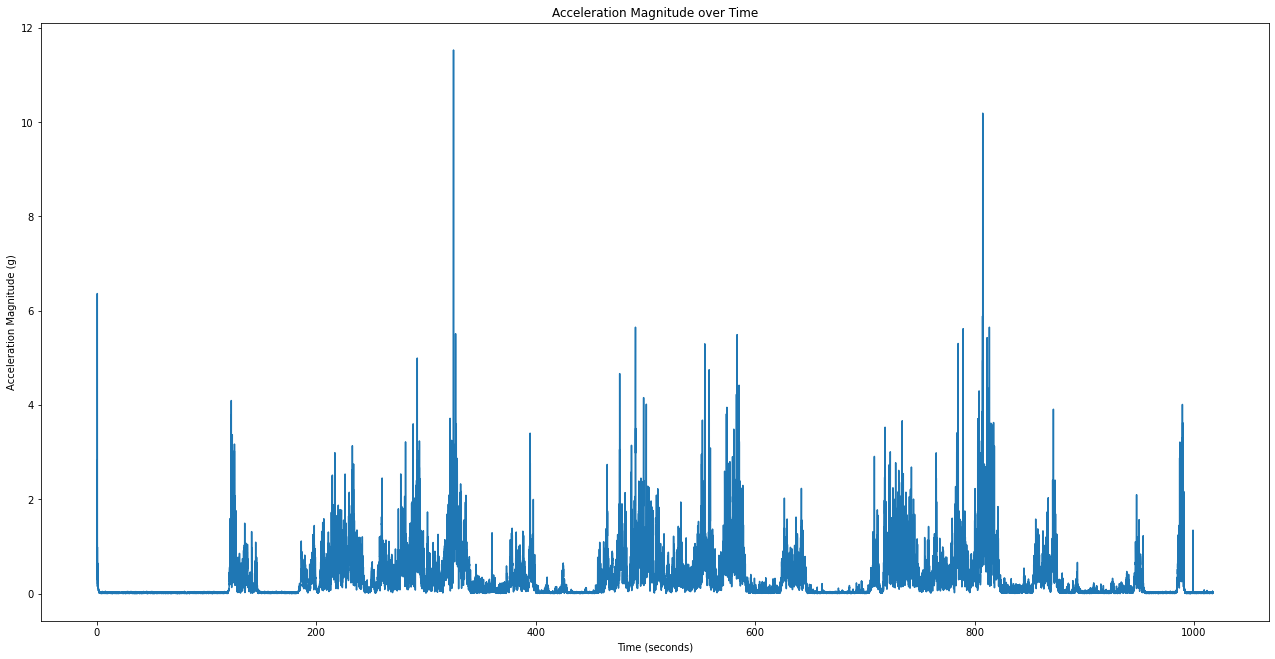

In [70]:
plot_acceleration_magnitude(filter_gravity(LW_data),50)

In [71]:
filtered_LW_data = filter_gravity(LW_data)

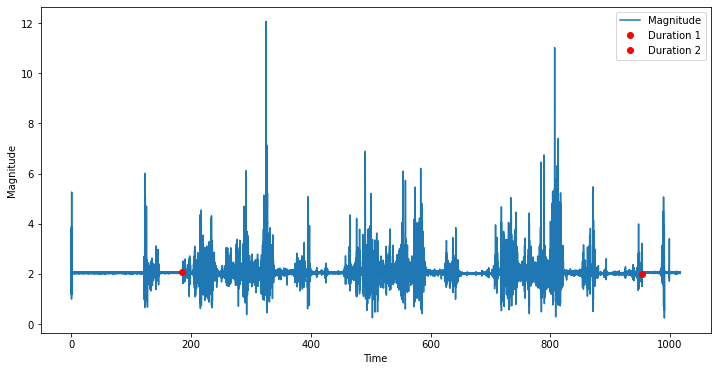

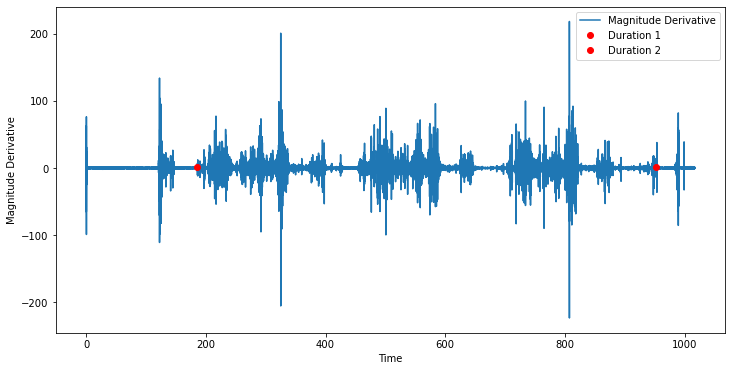

Duration 1: 185.5
Duration 2: 952.52
Number of Samples: 38352
Number of Video Frames: 19176
Conditions ok


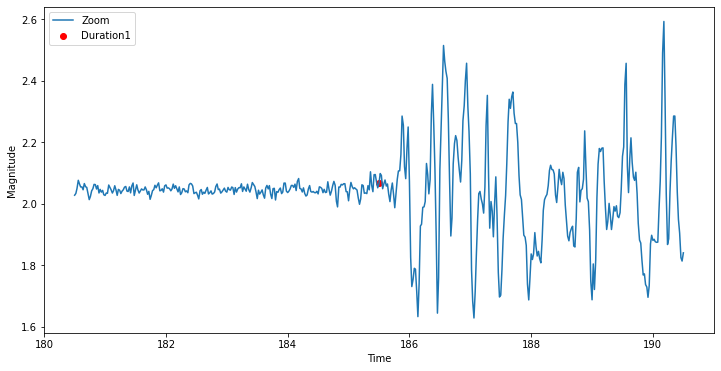

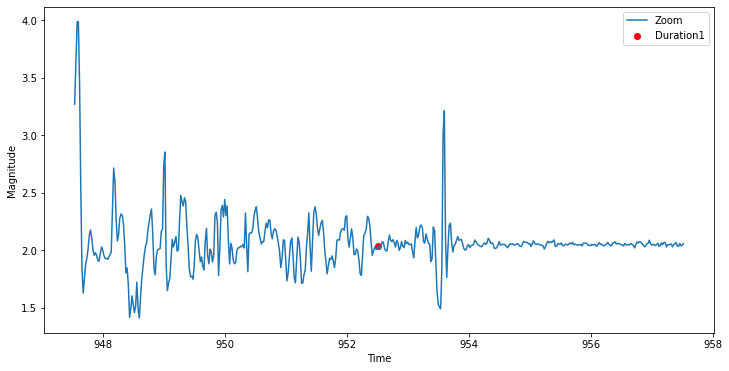

In [73]:
duration1 = 185.5
LW_data,  duration1, duration2 = plot_acceleration_with_timepoints(LW_data, duration1, trimmed_number_frames, trimmed_recording_time)
#LW_data, duration1, duration2 = plot_acceleration_with_timepoints(filtered_LW_data, duration1, trimmed_number_frames, trimmed_recording_time)

In [74]:
LW_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,0 days 00:00:00,2023-07-20 10:20:08.000,0.215390,0.698380,-1.283311,-228.958239,202.695437,-36.386002,0.970161,-0.075286,-0.052980,0.224396,-0.601894,-0.195732,-2.551351,465.459748,-48.528551,32.695679,1010.317433
1,0 days 00:00:00.020000,2023-07-20 10:20:08.020,0.192472,0.534638,-1.037464,-130.028882,248.880907,-40.002226,0.971083,-0.110301,-0.018988,0.210847,-0.579496,-0.551992,-2.309538,466.125778,-48.867849,34.140838,1010.187159
2,0 days 00:00:00.040000,2023-07-20 10:20:08.040,0.885852,-0.038516,-1.550900,124.266458,163.715466,-0.758335,0.971982,-0.114040,0.017112,0.204827,-0.466567,0.228087,-2.031042,463.607093,-47.584745,28.675767,1010.679808
3,0 days 00:00:00.060000,2023-07-20 10:20:08.060,0.961432,-0.795954,-2.699761,131.710632,64.052273,-43.073848,0.975248,-0.093460,0.034933,0.197348,-0.182321,-0.025261,-2.075242,432.530379,-31.753212,-38.754839,1016.758335
4,0 days 00:00:00.080000,2023-07-20 10:20:08.080,0.679814,-0.856815,-3.667427,-110.826624,43.472529,-42.019812,0.976631,-0.095497,0.042593,0.187757,-0.205235,-0.207503,-2.681686,434.141627,-32.574037,-35.258733,1016.443179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50846,0 days 00:16:56.919000,2023-07-20 10:37:04.920,-0.164975,0.060508,-2.048029,-0.058376,-0.119236,-0.000801,-0.029700,0.450171,-0.891928,-0.030475,-0.682088,0.048911,-2.243067,233.395554,-69.620007,-10.806669,1010.320000
50847,0 days 00:16:56.940000,2023-07-20 10:37:04.940,-0.165107,0.051832,-2.045558,-0.123053,-0.123342,0.060873,-0.029694,0.450169,-0.891930,-0.030467,-0.683086,0.000363,-2.291908,233.401171,-69.594731,-10.798244,1010.320000
50848,0 days 00:16:56.960000,2023-07-20 10:37:04.960,-0.157500,0.053899,-2.019601,-0.001749,-0.061859,0.001018,-0.029702,0.450161,-0.891933,-0.030468,-0.683112,0.047352,-2.293427,233.399692,-69.601388,-10.800463,1010.320000
50849,0 days 00:16:56.980000,2023-07-20 10:37:04.980,-0.149232,0.037173,-2.033081,0.000300,-0.002670,-0.000084,-0.029703,0.450161,-0.891933,-0.030466,-0.682044,0.096839,-2.244657,233.400082,-69.599633,-10.799878,1010.320000


In [75]:
LW_trimmed_data = trim_data(LW_data, duration1, duration2)
RW_trimmed_data = trim_data(RW_data, duration1, duration2)
chest_trimmed_data = trim_data(chest_data, duration1, duration2)

In [76]:
LW_trimmed_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
9275,0 days 00:03:05.500000,2023-07-20 10:23:13.500,-0.598685,0.402655,-1.936955,13.774275,-7.187858,-8.144891,-0.072040,-0.957503,0.241616,0.140070,-0.905738,0.270864,-2.184103,389.399985,-9.600011,-59.400019,1010.15
9276,0 days 00:03:05.520000,2023-07-20 10:23:13.520,-0.620626,0.416555,-1.960638,13.393711,-6.309369,-6.522819,-0.069274,-0.957818,0.240770,0.140769,-0.893365,0.263945,-2.119599,389.400016,-9.600041,-59.399982,1010.15
9277,0 days 00:03:05.539000,2023-07-20 10:23:13.540,-0.635330,0.372426,-1.958257,15.832892,-3.792477,-5.978674,-0.066416,-0.958125,0.240123,0.141160,-0.807347,0.150886,-2.091317,389.399952,-9.599825,-59.400054,1010.15
9278,0 days 00:03:05.560000,2023-07-20 10:23:13.560,-0.615488,0.317469,-1.928307,15.543702,-2.538401,-5.412233,-0.063332,-0.958472,0.239592,0.141127,-0.878420,0.195843,-2.113273,389.400177,-9.600660,-59.399801,1010.15
9279,0 days 00:03:05.580000,2023-07-20 10:23:13.580,-0.638836,0.336832,-1.934441,11.338030,-2.905188,-4.251352,-0.060846,-0.958739,0.239129,0.141190,-0.916511,0.210179,-2.178157,389.399339,-9.597536,-59.400741,1010.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47622,0 days 00:15:52.440000,2023-07-20 10:36:00.440,-0.091177,0.482669,-1.935912,-4.944138,8.741295,-12.429392,0.098657,0.967530,-0.226764,-0.052257,-0.627107,0.167871,-2.205957,408.291332,-42.524397,-51.291332,1010.31
47623,0 days 00:15:52.460000,2023-07-20 10:36:00.460,-0.099917,0.548505,-1.951765,-7.756704,4.712941,-9.856356,0.099987,0.967890,-0.224775,-0.051647,-0.664682,0.182447,-2.192587,406.561151,-39.410072,-49.561151,1010.31
47624,0 days 00:15:52.480000,2023-07-20 10:36:00.480,-0.129307,0.540092,-1.930344,-9.602577,1.419405,-6.650280,0.101602,0.968050,-0.223342,-0.051723,-0.657232,0.275928,-2.200586,404.697450,-36.055410,-47.697450,1010.31
47625,0 days 00:15:52.500000,2023-07-20 10:36:00.500,-0.118295,0.521893,-1.944062,-10.532426,-1.627664,-3.750455,0.103363,0.968040,-0.222435,-0.052315,-0.661453,0.303838,-2.170548,405.081041,-36.745874,-48.081041,1010.31


In [77]:
# Save everything in the correct folder
save_data(path, participant_id, frame_start, frame_end, duration1, LW_trimmed_data, RW_trimmed_data, chest_trimmed_data)

The integers have been saved to the file: '../CreateStudy\H006\H006_video_parameters.txt'
Video parameters saved.
Trimmed data for LW saved to: ../CreateStudy\H006\trimmed_LW_data.csv
Trimmed data for RW saved to: ../CreateStudy\H006\trimmed_RW_data.csv
Trimmed data for chest saved to: ../CreateStudy\H006\trimmed_chest_data.csv
